<a href="https://colab.research.google.com/github/RigvedRocks/Music-Genre-Classification/blob/main/song_genre_classification_using_rnn_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! pip install -q kaggle
from google.colab import files
 
files.upload()
! mkdir ~/.kaggle
 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
 
!kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification
!ls

Saving kaggle.json to kaggle.json
100% 1.21G/1.21G [00:42<00:00, 27.2MB/s]
100% 1.21G/1.21G [00:42<00:00, 30.3MB/s]
gtzan-dataset-music-genre-classification.zip  kaggle.json  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
! mkdir train
! unzip gtzan-dataset-music-genre-classification.zip -d train

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: train/Data/features_30_sec.csv  
  inflating: train/Data/features_3_sec.csv  
  inflating: train/Data/genres_original/blues/blues.00000.wav  
  inflating: train/Data/genres_original/blues/blues.00001.wav  
  inflating: train/Data/genres_original/blues/blues.00002.wav  
  inflating: train/Data/genres_original/blues/blues.00003.wav  
  inflating: train/Data/genres_original/blues/blues.00004.wav  
  inflating: train/Data/genres_original/blues/blues.00005.wav  
  inflating: train/Data/genres_original/blues/blues.00006.wav  
  inflating: train/Data/genres_original/blues/blues.00007.wav  
  inflating: train/Data/genres_original/blues/blues.00008.wav  
  inflating: train/Data/genres_original/blues/blues.00009.wav  
  inflating: train/Data/genres_original/blues/blues.00010.wav  
  inflating: train/Data/genres_original/blues/blues.00011.wav  
  inflating: train/Data/genres_original/blues/blues.00012.wav  
  inflating: train/Dat

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore',category = UserWarning)

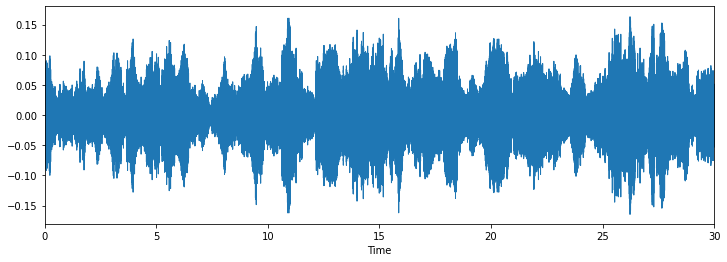

In [ ]:
data,sampling_rate = librosa.load('train/Data/genres_original/classical/classical.00001.wav')
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,sr = sampling_rate)

In [ ]:
features_30_sec = pd.read_csv('train/Data/features_30_sec.csv')

In [ ]:
print(features_30_sec.shape)

(1000, 60)


In [ ]:
print(features_30_sec.columns)

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [ ]:
features_30_sec.head(125)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
features_30_sec.label.value_counts()

country      100
blues        100
metal        100
classical    100
pop          100
rock         100
disco        100
hiphop       100
reggae       100
jazz         100
Name: label, dtype: int64

In [ ]:
bluestrain = features_30_sec.iloc[0:90,:]
classicaltrain = features_30_sec.iloc[100:190,:]
countrystrain = features_30_sec.iloc[200:290,:]
discotrain = features_30_sec.iloc[300:390,:]
hiphoptrain = features_30_sec.iloc[400:490,:]
jazztrain = features_30_sec.iloc[500:590,:]
metaltrain = features_30_sec.iloc[600:690,:]
poptrain = features_30_sec.iloc[700:790,:]
reggaetrain = features_30_sec.iloc[800:890,:]
rocktrain = features_30_sec.iloc[900:990,:]
train = pd.concat([bluestrain,classicaltrain,countrystrain,discotrain,hiphoptrain,jazztrain,metaltrain,poptrain,reggaetrain,rocktrain])

In [ ]:
print(train.shape)

(900, 60)


In [ ]:
train.label.value_counts()

country      90
blues        90
metal        90
classical    90
pop          90
rock         90
disco        90
hiphop       90
reggae       90
jazz         90
Name: label, dtype: int64

In [ ]:
bluestest = features_30_sec.iloc[90:100,:]
classicaltest = features_30_sec.iloc[190:200,:]
countrytest = features_30_sec.iloc[290:300,:]
discotest = features_30_sec.iloc[390:400,:]
hiphoptest = features_30_sec.iloc[490:500,:]
jazztest = features_30_sec.iloc[590:600,:]
metaltest = features_30_sec.iloc[690:700,:]
poptest = features_30_sec.iloc[790:800,:]
reggaetest = features_30_sec.iloc[890:900,:]
rocktest = features_30_sec.iloc[990:1000,:]
test = pd.concat([bluestest,classicaltest,countrytest,discotest,hiphoptest,jazztest,metaltest,poptest,reggaetest,rocktest])

In [ ]:
print(test.shape)

(100, 60)


In [ ]:
test.label.value_counts()

reggae       10
country      10
blues        10
disco        10
hiphop       10
metal        10
classical    10
jazz         10
rock         10
pop          10
Name: label, dtype: int64

In [ ]:
train.drop(train[train.filename == 'jazz.00054.wav'].index,inplace = True)

In [ ]:
def parser(row):
    data_dir = 'train/Data/genres_original/'
    file_name = os.path.join(data_dir,row.label + '/' + row.filename)
    try:
    #kaiser_fast is a technique used for faster extraction
      X,sample_rate = librosa.load(file_name,res_type = "kaiser_fast")
    #we extract mfcc features from data
      mfccs = np.mean(librosa.feature.mfcc(y=X,sr = sample_rate,n_mfcc=40).T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", row.filename)
        return None, None
    features = mfccs
    label = row.label
    
    
    return [features,label]

#temp = pd.DataFrame(columns = ['features','label'])
temp = train.apply(parser,axis = 1,result_type = 'expand')
temp.columns = ['features','label']
print(type(temp))
    

<class 'pandas.core.frame.DataFrame'>


In [ ]:
s = test.apply(parser,axis = 1,result_type = 'expand')
s.columns = ['features','label']
print(type(s))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(temp.columns)

Index(['features', 'label'], dtype='object')


In [ ]:
temp.shape

(899, 2)

In [ ]:
print(s.shape)

(100, 2)


In [ ]:
from sklearn.svm import SVC
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


X = np.array(temp.features.tolist())
y = np.array(temp.label.tolist())

In [ ]:
lb = LabelEncoder()
lb.fit(y)
y = lb.transform(y)

In [ ]:
print(y.shape)

(899,)


In [ ]:
y = np_utils.to_categorical(y)

In [ ]:
print(y.shape)

(899, 10)


In [ ]:
print(X.shape)

(899, 40)


In [ ]:
x_test = np.array(s.features.tolist())
y_test = np.array(s.label.tolist())

In [ ]:
print(y_test.shape)

(100,)


In [ ]:
y_test = lb.transform(y_test)

In [ ]:
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)

(100, 10)


In [ ]:
from numpy import savez_compressed
from numpy import load
savez_compressed('training_and_test_set.npz',X,y,x_test,y_test)

In [ ]:
data = load('./training_and_test_set.npz')
X,y,x_test,y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Embedding,Dense,Bidirectional,LSTM,BatchNormalization,GRU,Dropout
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential
from keras.callbacks import History

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [ ]:
N_TRAIN = 899
STEPS_PER_EPOCH = 90

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
def get_callbacks():
    return[
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor = "categorical_crossentropy",patience = 20)
    ]

In [ ]:
def compile_and_fit(X,y,batch,num_epochs,x_test,y_test,optimizer = None):
    if optimizer is None:
        optimizer = get_optimizer()
    
    model = Sequential()
    #model.add(Bidirectional(LSTM(units = 64,return_sequences = True,input_shape=(40,1))))
    #model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(units = 64,return_sequences = True,input_shape =(40,1)))) 
    model.add(Dropout(0.5))
    model.add(Dense(2048,activation='relu',kernel_regularizer = keras.regularizers.l2(l = 0.0001)))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation = 'relu',kernel_regularizer = keras.regularizers.l2(l = 0.0001)))
    model.add(Dropout(0.5))
    model.add(Dense(2048,activation='relu',kernel_regularizer = keras.regularizers.l2(l = 0.0001)))
    model.add(Dropout(0.5))
    model.add(Dense(1024,activation = 'relu'))
    model.add(Dense(10,activation = 'softmax'))
    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[
                  tf.keras.losses.CategoricalCrossentropy(
                      from_logits=True, name='categorical_crossentropy'),
                  'accuracy'])
 
    
 
    history = model.fit(
    X,y,
    steps_per_epoch = batch,
    epochs=num_epochs,
    validation_data=(x_test,y_test),
    callbacks=get_callbacks(),
    verbose=0)
    return history

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'categorical_crossentropy', smoothing_std=10)
regularizer_histories = {}

In [ ]:
def built_model(BATCH_SIZE,NUM_EPOCHS,X,y,x_test,y_test):
    
    regularizer_histories['combined'] = compile_and_fit(X,y,BATCH_SIZE,NUM_EPOCHS,x_test,y_test)
    return regularizer_histories
    
    

In [ ]:
batch = 150
num_epoch = 150
X = X.reshape(X.shape[0],X.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
his = built_model(batch,num_epoch,X,y,x_test,y_test)

ValueError: ignored

In [ ]:
plotter.plot(his)

NameError: ignored

In [ ]:
#def ensemble_predictions(members, testX):

 #   yhats = [model.predict(testX) for model in members]
 #   yhats = array(yhats)
 #   summed = np.sum(yhats, axis=0)
 #   result = argmax(summed, axis=1)
 #   return result

In [ ]:
#def evaluate_n_members(members, n_members, testX, testy):

#    subset = members[:n_members]
#    print(len(subset))
#    yhat = ensemble_predictions(subset, testX)
#    return accuracy_score(testy, yhat)

In [ ]:
#n_members = 5
#members = [built_model(batch,num_epoch,X,y,x_test,y_test) for _ in range(n_members)]

In [ ]:
#scores = list()
#for i in range(1, n_members+1):
#        score = evaluate_n_members(members, i, x_test,y_test)
#        print('> %.3f' % score)
#        scores.append(score)

In [ ]:
#x_axis = [i for i in range(1, n_members+1)]
#pyplot.plot(x_axis, scores)
#pyplot.show()